# Workshop 1 - Project 2
## Clara Duchoissis & Patrick Silva

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pl.read_csv('dwca-birds_nk-v1.5/occurrence.txt', separator='\t')
df.describe()

statistic,id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,str,f64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""count""","""89632""","""89632""","""89632""","""89632""","""89632""",89552.0,"""89632""","""89632""",89632.0,89632.0,"""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632""","""89632"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",80.0,"""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,2.081472,null,null,-1.199514,37.039653,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,34.485674,null,null,1.415014,1.528497,null,null,null,null,null,null,null,null,null
"""min""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Nature Kenya""","""HumanObservation""","""00011221-51a1-4fe6-a6f7-16cf2e…","""Critically Endangered (CR)""",1.0,"""2017-06-01""","""KE""",-4.719087,34.016667,"""Accipiter badius""","""Animalia""","""Chordata""","""AVES""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""Gallinago""","""Abbott's Booby"""
"""25%""",null,null,null,null,null,1.0,null,null,-1.67268,36.256333,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,1.0,null,null,-1.238391,36.8005,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,1.0,null,null,-0.332612,37.532486,null,null,null,null,null,null,null,null,null
"""max""","""ffffc424-17f5-467d-b736-928d37…","""Nature Kenya""","""HumanObservation""","""ffffc424-17f5-467d-b736-928d37…","""Vulnerable (VU)""",7000.0,"""2018-05-16""","""KE""",4.2018333,41.433333,"""agricola pallidus""","""Animalia""","""Chordata""","""Aves""","""passeriformes""","""Zosteropidae""","""pternistis""","""zonurus""","""black kite"""


In [3]:
df.head()

id,institutionCode,basisOfRecord,occurrenceID,occurrenceRemarks,individualCount,eventDate,countryCode,decimalLatitude,decimalLongitude,scientificName,kingdom,phylum,class,order,family,genus,specificEpithet,vernacularName
str,str,str,str,str,i64,str,str,f64,f64,str,str,str,str,str,str,str,str,str
"""579a9f82-3eab-45c2-875d-fcb634…","""Nature Kenya""","""HumanObservation""","""579a9f82-3eab-45c2-875d-fcb634…","""Least Concern (LC)""",1,"""2018-01-04""","""KE""",-2.223293,40.967442,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""190323ff-2e26-4964-961e-79ac0f…","""Nature Kenya""","""HumanObservation""","""190323ff-2e26-4964-961e-79ac0f…","""Least Concern (LC)""",1,"""2018-01-11""","""KE""",0.632465,36.035565,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""82c2acec-5ed5-4b92-be62-2b4352…","""Nature Kenya""","""HumanObservation""","""82c2acec-5ed5-4b92-be62-2b4352…","""Least Concern (LC)""",1,"""2018-01-12""","""KE""",1.010063,37.385208,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""e49afe06-1ab4-410e-8971-186b59…","""Nature Kenya""","""HumanObservation""","""e49afe06-1ab4-410e-8971-186b59…","""Least Concern (LC)""",1,"""2018-01-13""","""KE""",1.114823,37.460524,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""
"""f34df1bf-97f4-47c8-baa8-58a2d4…","""Nature Kenya""","""HumanObservation""","""f34df1bf-97f4-47c8-baa8-58a2d4…","""Least Concern (LC)""",1,"""2018-01-30""","""KE""",1.014339,37.393476,"""Accipiter badius""","""Animalia""","""Chordata""","""Aves""","""Accipitriformes""","""Accipitridae""","""Accipiter""","""badius""","""Shikra"""


In [4]:
rows = len(df.select('id').rows())
print(f"The dataset has {rows} rows")

for column in df.columns:
    uc = len(df.select(column).unique().rows())
    print(f"The column '{column}' has a unique count of {uc}")

The dataset has 89632 rows
The column 'id' has a unique count of 89632
The column 'institutionCode' has a unique count of 1
The column 'basisOfRecord' has a unique count of 1
The column 'occurrenceID' has a unique count of 89632
The column 'occurrenceRemarks' has a unique count of 8
The column 'individualCount' has a unique count of 117
The column 'eventDate' has a unique count of 349
The column 'countryCode' has a unique count of 1
The column 'decimalLatitude' has a unique count of 54651
The column 'decimalLongitude' has a unique count of 54540
The column 'scientificName' has a unique count of 1267
The column 'kingdom' has a unique count of 1
The column 'phylum' has a unique count of 1
The column 'class' has a unique count of 2
The column 'order' has a unique count of 35
The column 'family' has a unique count of 113
The column 'genus' has a unique count of 443
The column 'specificEpithet' has a unique count of 938
The column 'vernacularName' has a unique count of 1429


In [5]:
institutionCode = df.item(0, "institutionCode")
basisOfRecord = df.item(0, "basisOfRecord")
countryCode = df.item(0, "countryCode")
kingdom = df.item(0, "kingdom")
phylum = df.item(0, "phylum")
    
df = df.drop(["institutionCode", "basisOfRecord", "countryCode", "kingdom", "phylum", "occurrenceID"])

In [6]:
# will give error code and information on how to actually access the map of Kenya
# explains the links in the following markdown section
run = False
if run:
    kenya = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

We download the countries zip-file from the link in the error message. (https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)

It's the first download link on the site under 'Admin 0 – Countries'.

In [7]:
kenya = gpd.read_file("ne_110m_admin_0_countries.zip")
kenya = kenya[kenya.NAME == "Kenya"]

# QUESTION 1

In [8]:
q1_df = df.select("decimalLatitude", "decimalLongitude", "order") 
# other columns are not needed

In [19]:
def plot_kenya_order(orders):
    order_data = q1_df.filter(pl.col('order').is_in(orders))
    
    # sort to avoid smaller orders to be hidden by larger orders
    order_counts = order_data.group_by('order').len().sort("len")
    order_data = order_data.join(order_counts, on='order').sort(by='len', descending=True)
    
    palette = ["yellow", "green", "red"]

    _, ax = plt.subplots(figsize=(10, 10))
    plt.grid()
    kenya.plot(ax=ax, color='grey', edgecolor='black')

    sns.scatterplot(data=order_data, x='decimalLongitude', y='decimalLatitude', hue="order", palette=palette, ax=ax, s=35, alpha=0.6, edgecolor='none')
    
    plt.title(f'Bird Sightings in Kenya')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

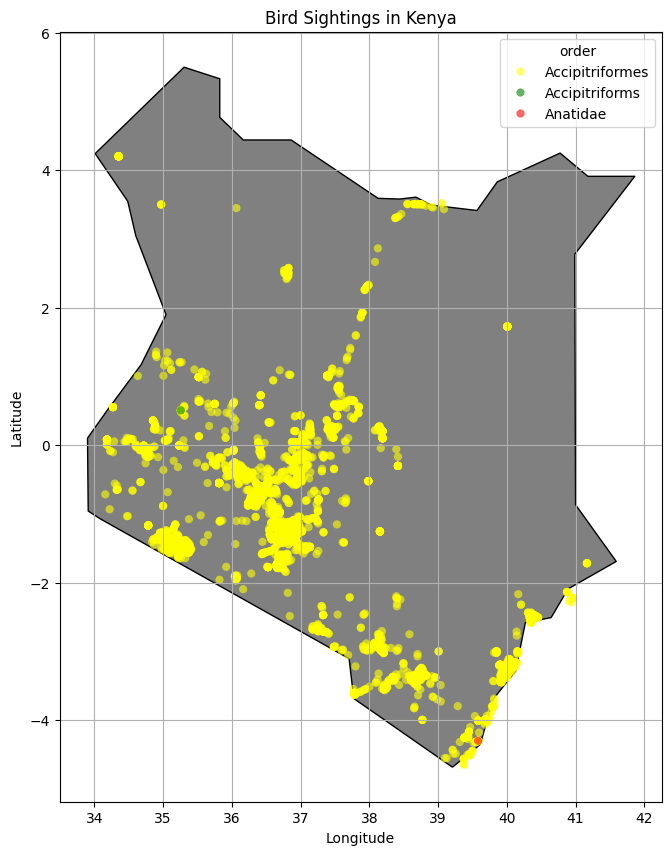

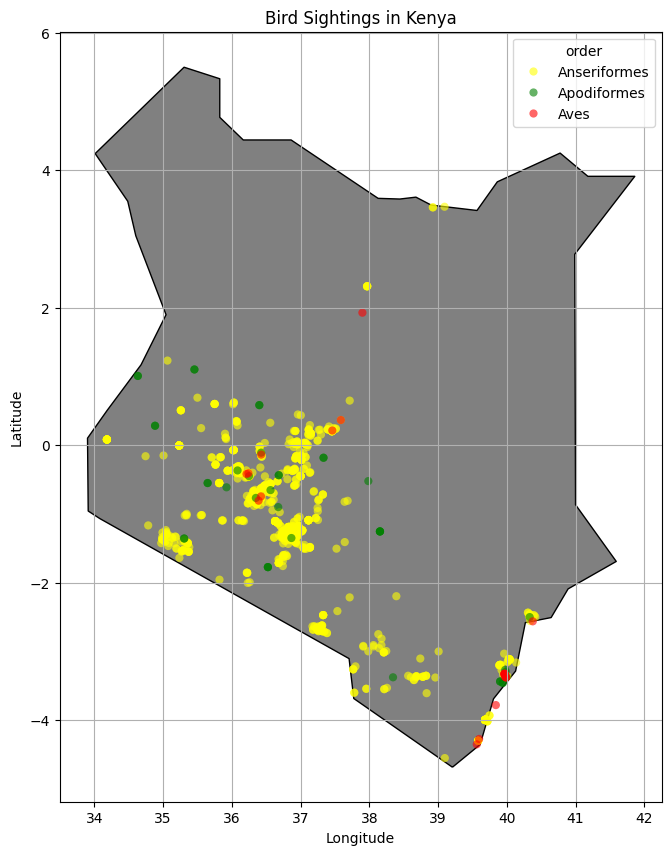

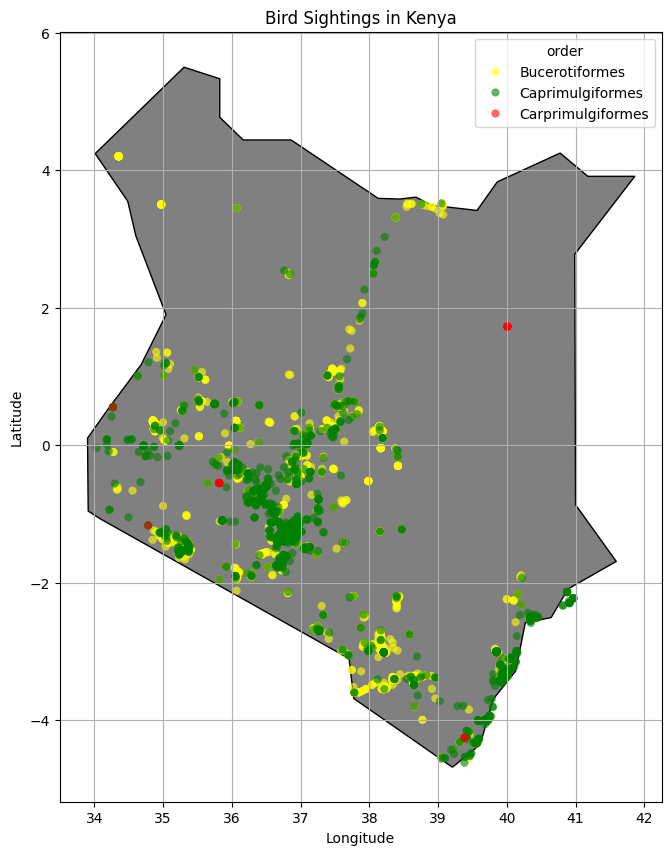

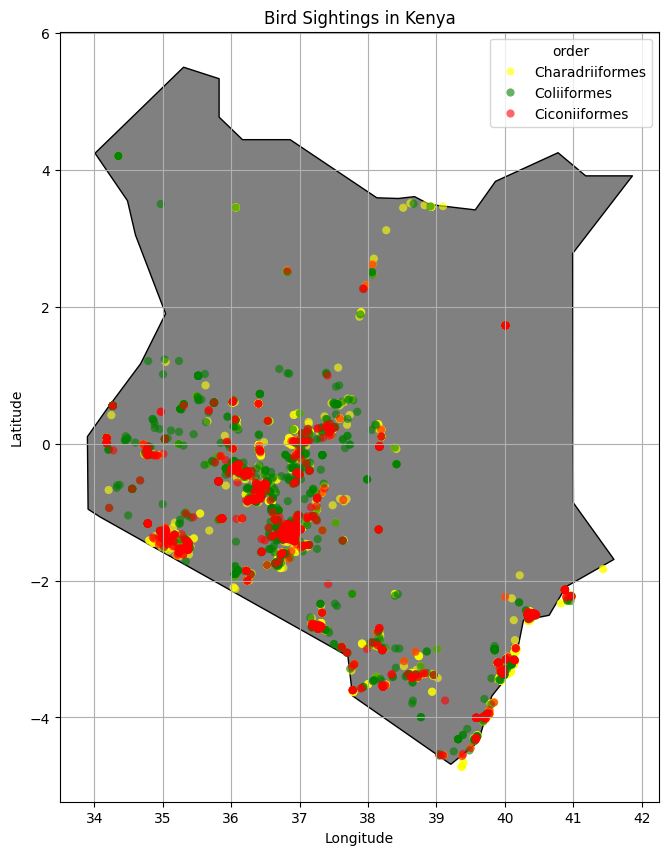

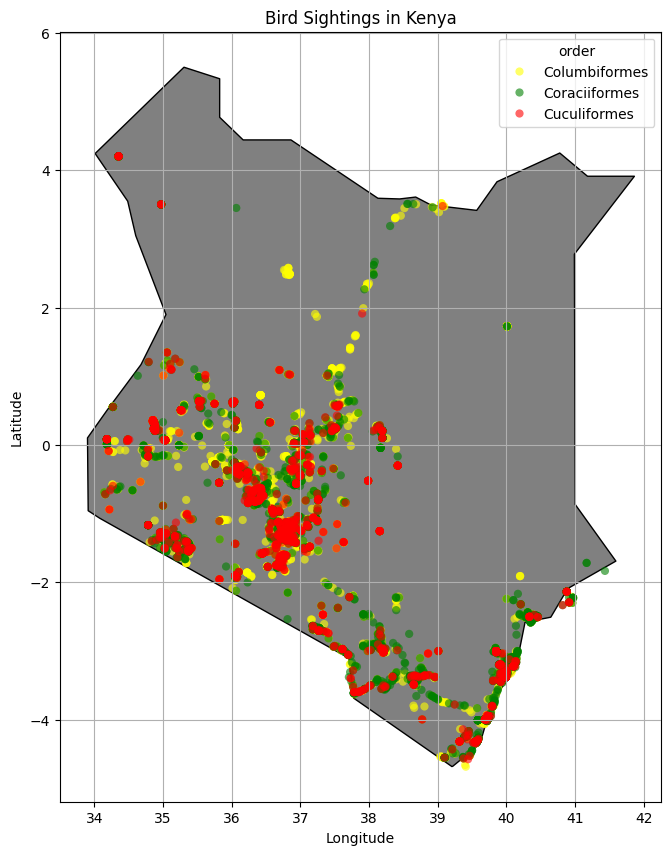

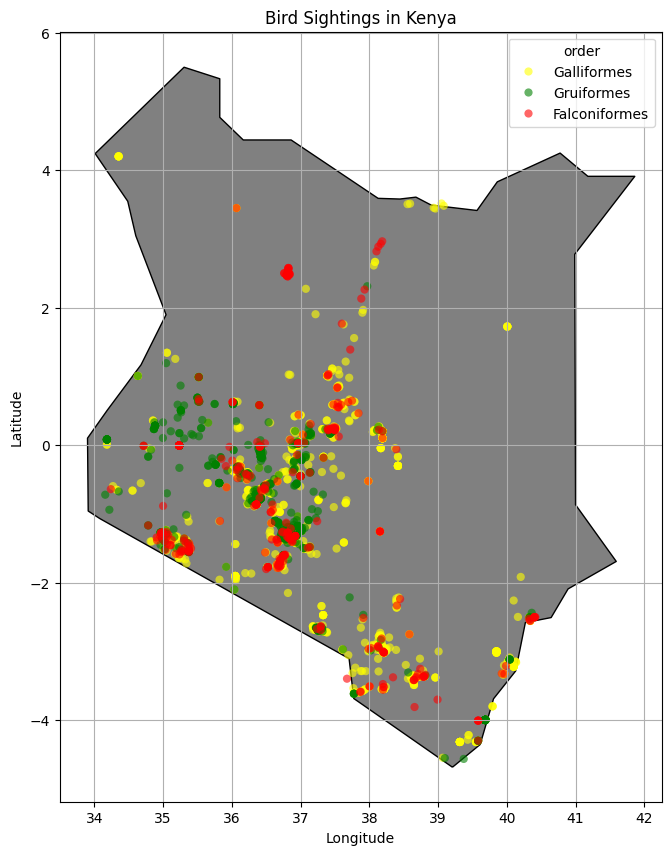

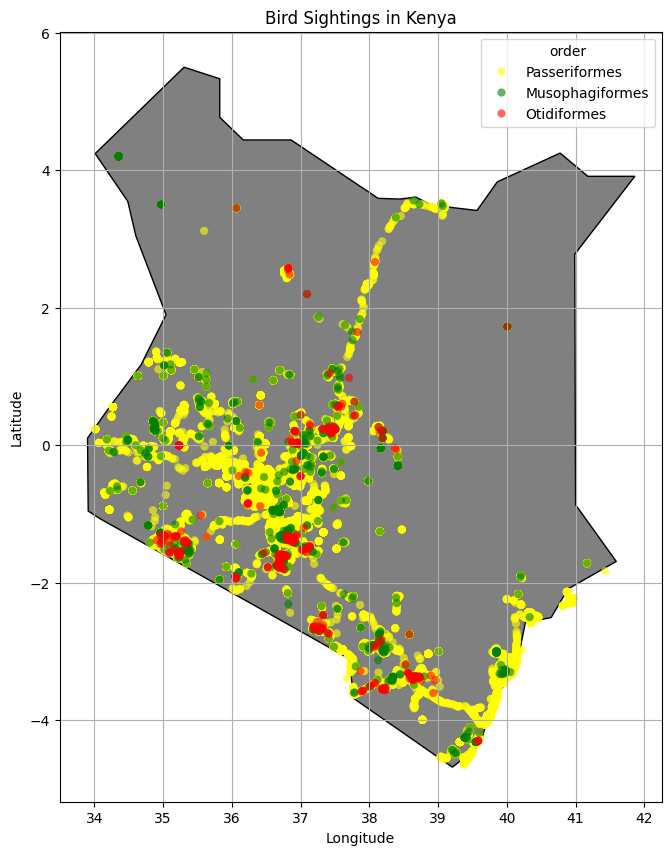

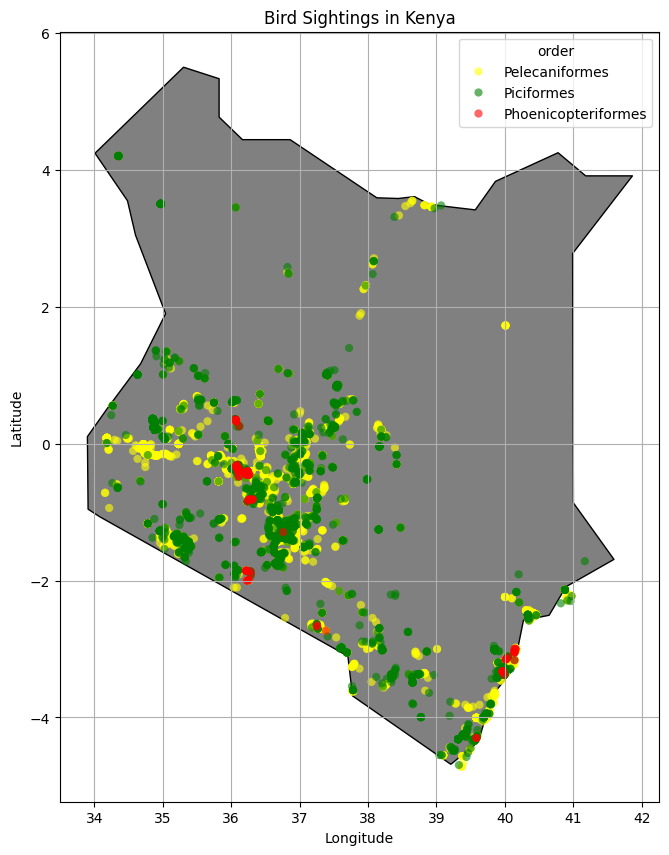

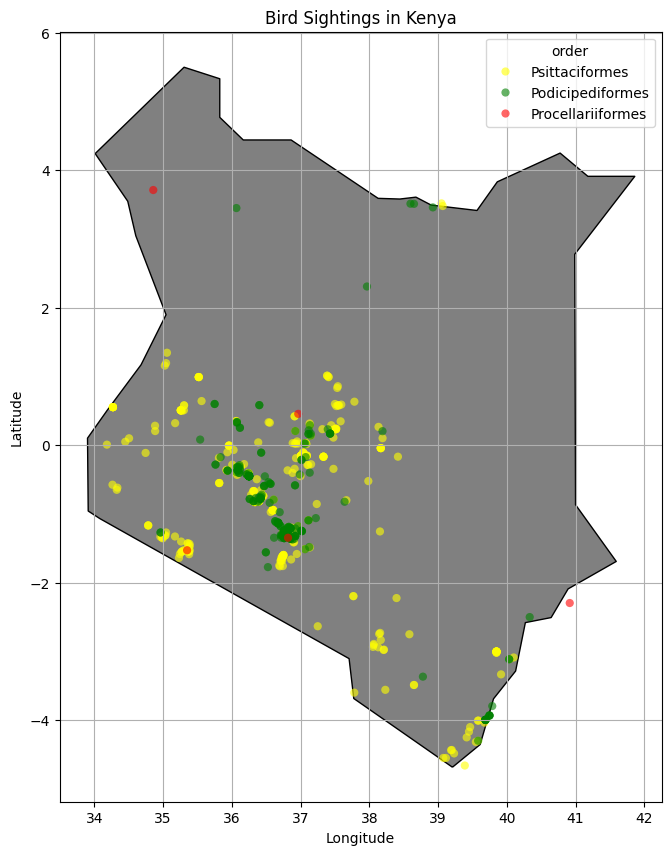

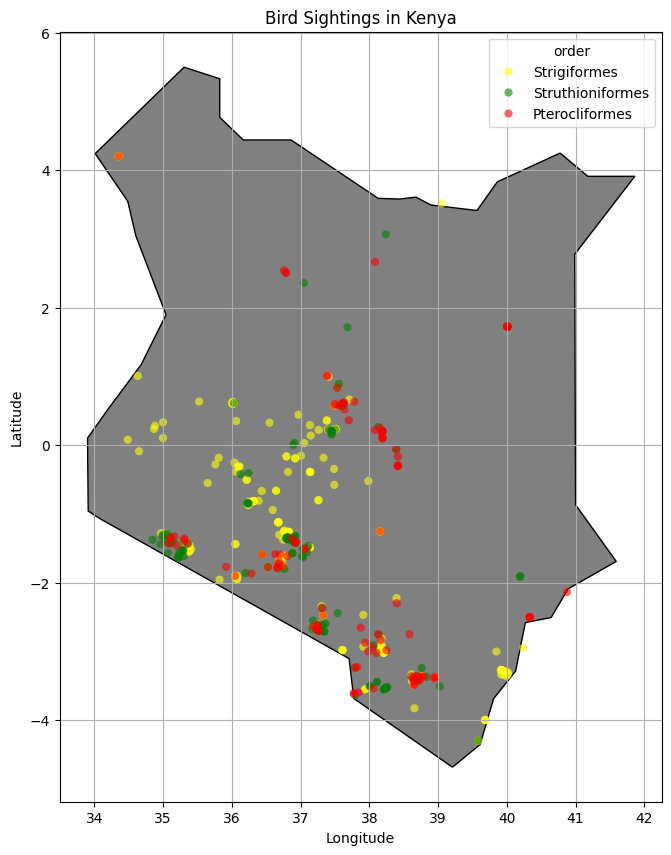

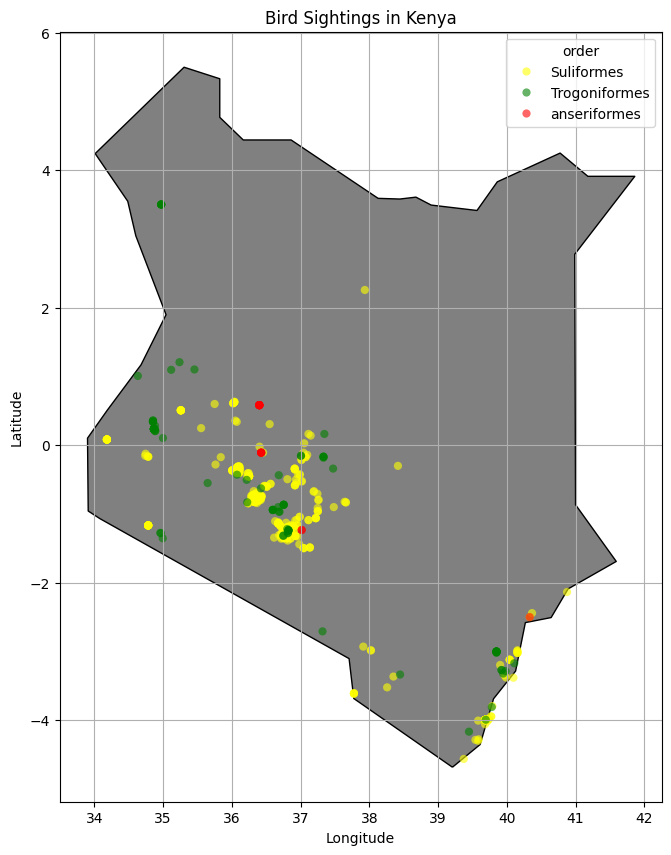

In [21]:
orders = sorted(q1_df['order'].unique().to_list())
current_orders = []
for order in orders:
    current_orders.append(order)
    if len(current_orders) == 3:
        plot_kenya_order(current_orders)
        current_orders = []